In [1]:
# Dependencies
import pandas as pd
import requests
import time
import json
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
# Import cities file as DataFrame
data_df = pd.read_csv("athlete_events.csv")
data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# checking columns of dataframe
data_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
# Data DF filtered by Season Summer
All_summer_data_df = data_df.loc[data_df['Season'] == 'Summer']
All_summer_data_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [5]:
# Total combined count of metals summer
All_summer_data_df = data_df.groupby('Medal').size()
All_summer_data_df

Medal
Bronze    13295
Gold      13372
Silver    13116
dtype: int64

In [6]:
# Data DF filtered by Season Winter
All_winter_data_df = data_df.loc[data_df['Season'] == 'Winter']
All_winter_data_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
# Total combined count of metals both winter
All_winter_data_df = data_df.groupby('Medal').size()
All_winter_data_df

Medal
Bronze    13295
Gold      13372
Silver    13116
dtype: int64

In [8]:
# Filtered Data DF down to United States
usa_df = data_df.loc[data_df['Team'] == 'United States']
usa_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN


In [9]:
# Usa DF filtered by Season - Summer
summer_usa_df = usa_df.loc[usa_df['Season'] == 'Summer']
summer_usa_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
273,142,"David ""Dave"" Abbott",M,26.0,183.0,75.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Athletics,"Athletics Men's 5,000 metres",NaN
282,149,Mara Katherine Abbott,F,30.0,163.0,52.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Women's Road Race, Individual",NaN
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN


In [10]:
# Usa DF filtered by Season - Winter
winter_usa_df = usa_df.loc[usa_df['Season'] == 'Winter']
winter_usa_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270709,135381,Angela Zuckerman (-Davre),F,26.0,175.0,65.0,United States,USA,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 3,000 metres",NaN
270710,135381,Angela Zuckerman (-Davre),F,28.0,175.0,65.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,500 metres",NaN
270711,135381,Angela Zuckerman (-Davre),F,28.0,175.0,65.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 3,000 metres",NaN
270716,135385,Reed Johann Zuehlke,M,19.0,178.0,72.0,United States,USA,1980 Winter,1980,Winter,Lake Placid,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN


In [12]:
#summer_usa_count_by_type_df = summer_usa_count_by_type['Medal'].value_counts().reset_index()
summer_usa_count_by_type = summer_usa_df[summer_usa_df['NOC'] == 'USA']
summer_usa_count_by_type_df = summer_usa_count_by_type['Medal'].value_counts().reset_index()
summer_usa_count_by_type_df.columns = ['Medal', 'Count Summer USA Medals 1896 - 2016']
summer_usa_count_by_type_df = summer_usa_count_by_type_df.set_index('Medal').reindex(['Gold', 'Silver', 'Bronze']).reset_index()
summer_usa_count_by_type_df

,Medal,Count Summer USA Medals 1896 - 2016
0,Gold,2333
1,Silver,1241
2,Bronze,1112


In [13]:
summer_usa_count_by_type_df = summer_usa_count_by_type_df.style.bar(subset=["Count Summer USA Medals 1896 - 2016"], color="lightblue", vmin=0)
summer_usa_count_by_type_df

,Medal,Count Summer USA Medals 1896 - 2016
0,Gold,2333
1,Silver,1241
2,Bronze,1112


In [15]:
#Winter Dataframe
winter_usa_count_by_type = winter_usa_df[winter_usa_df['NOC'] == 'USA']
winter_usa_count_by_type_df = winter_usa_count_by_type['Medal'].value_counts().reset_index()
winter_usa_count_by_type_df.columns = ['Medal', 'Count Winter USA Medals 1896 - 2016']
winter_usa_count_by_type_df = winter_usa_count_by_type_df.set_index('Medal').reindex(['Gold', 'Silver', 'Bronze']).reset_index()
winter_usa_count_by_type_df

,Medal,Count Winter USA Medals 1896 - 2016
0,Gold,141
1,Silver,271
2,Bronze,121


In [16]:
winter_usa_count_by_type_df = winter_usa_count_by_type_df.style.bar(subset=["Count Winter USA Medals 1896 - 2016"], color="lightblue", vmin=0)
winter_usa_count_by_type_df

,Medal,Count Winter USA Medals 1896 - 2016
0,Gold,141
1,Silver,271
2,Bronze,121


In [ ]:
# USA Winter DF grouped by type of medal with count
winter_usa_count_by_type = winter_usa_df.groupby('Medal').size()
winter_usa_count_by_type

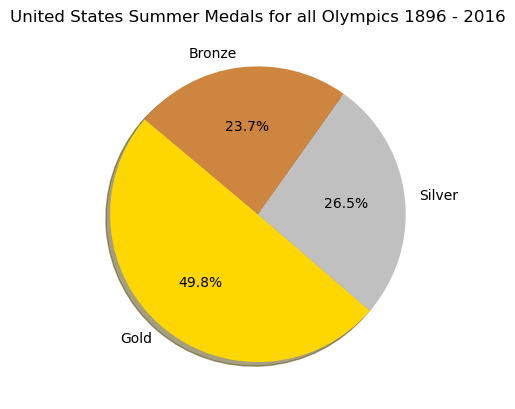

In [17]:
#USA Summer Count by Type
#Bronze    1112
#Gold      2333
#Silver    1241

# Labels for the sections of our pie chart
labels = ["Gold", "Silver", "Bronze"]

# The values of each section of the pie chart
sizes = [2333, 1241, 1112]

# The colors of each section of the pie chart
colors = ["gold", "silver", "peru"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('United States Summer Medals for all Olympics 1896 - 2016')

# Save the Figure
plt.savefig("output_data/US_Summer_all_medals.png")

#show Pie Chart
plt.show()

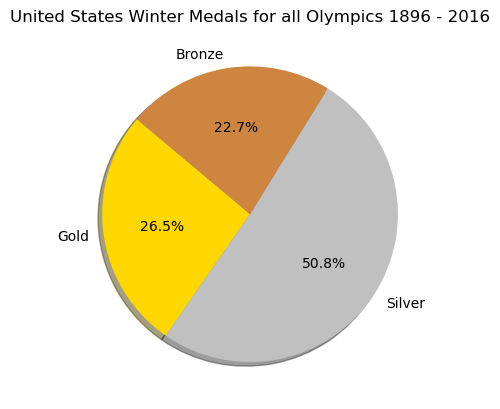

In [19]:
#USA Winter Count by Type
#Bronze    121
#Gold      141
#Silver    271

# Labels for the sections of our pie chart
labels = ["Gold", "Silver", "Bronze"]

# The values of each section of the pie chart
sizes = [141, 271, 121]

# The colors of each section of the pie chart
colors = ["gold", "silver", "peru"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('United States Winter Medals for all Olympics 1896 - 2016')

# Save the Figure
plt.savefig("output_data/US_Winter_all_medals.png")

#show Pie Chart
plt.show()